In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [14]:
import pandas
dsms=pd.read_csv("spam.csv",encoding='latin-1')
dsms.head()
dsms = dsms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
dsms = dsms.rename(columns={'v1':'label','v2':'sms'})
dsms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
print(len(dsms))
dsms.label.value_counts()
dsms.describe()
dsms['length']=dsms['sms'].apply(len)

5572


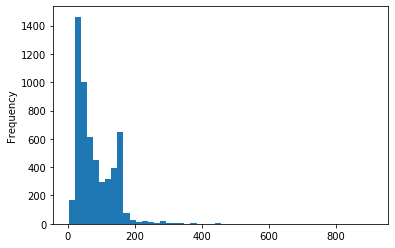

In [16]:
dsms['length'].plot(bins=50,kind='hist')

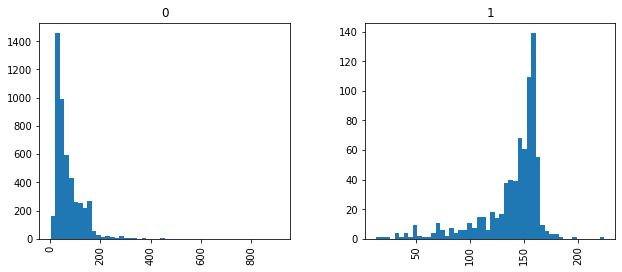

In [19]:
dsms.hist(column='length', by='label', bins=50, figsize=(10,4))
dsms.loc[:,'label']=dsms.label.map({'ham':0,'spam':1})

In [18]:
print(dsms.shape)
dsms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(dsms['sms'],dsms['label'],test_size=0.20,random_state=1)
count_vector = CountVectorizer()
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(X_test)

In [7]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_data,y_train)
MultinomialNB(alpha=1.0,class_prior=None,fit_prior=True)
pred = nb.predict(test_data)


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
cm = confusion_matrix(y_test, pred)
print(cm)
print("Accuracy score is :")
print(accuracy_score(y_test, pred))
print("Precision score is :")
print(precision_score(y_test, pred))
print("Recall score is :")
print(recall_score(y_test, pred))
print("f1 score is :")
print(f1_score(y_test, pred))
print(classification_report(y_test,pred))


[[968   8]
 [  9 130]]
Accuracy score is :
0.9847533632286996
Precision score is :
0.9420289855072463
Recall score is :
0.935251798561151
f1 score is :
0.9386281588447652
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.94      0.94      0.94       139

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

